# Example scripts to generate aperture and phase maskswith pyMOE 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

In [3]:

from matplotlib import pyplot as plt 
import numpy as np 
import sys
sys.path.insert(0,'..')
import pyMOE as moe
from scipy.constants import micro, nano, milli

## First example: Circular aperture 

<IPython.core.display.Javascript object>


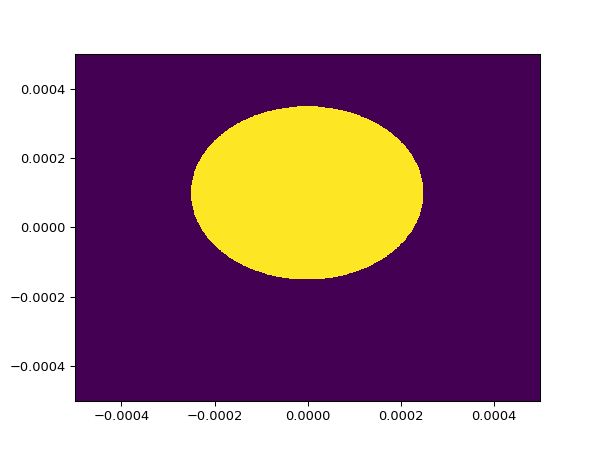

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [4]:
# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)

# Create circular aperture on mask
center=(0*micro, 100*micro)
mask = moe.generate.circular_aperture(mask, radius=250*micro, center=center )


# Accessing data inside mask class
amplitude = mask.aperture

x = mask.x
y = mask.y

XX = mask.XX
YY = mask.YY


plt.figure()
plt.pcolormesh(x,y,amplitude)

# Plotting using internal functions

In [5]:
mask

<IPython.core.display.Javascript object>


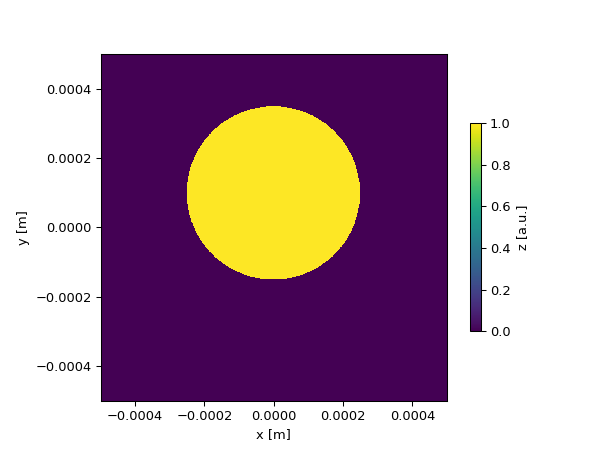

..\pyMOE\plotting.py:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = plt.pcolormesh(aperture.x/scale_factor, aperture.y/scale_factor, aperture.aperture,)


<IPython.core.display.Javascript object>


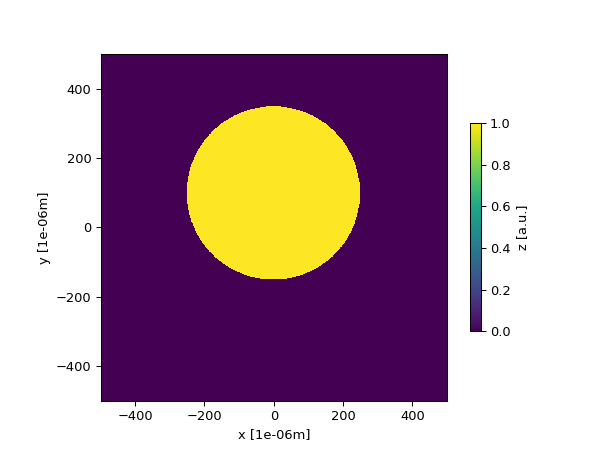

<IPython.core.display.Javascript object>


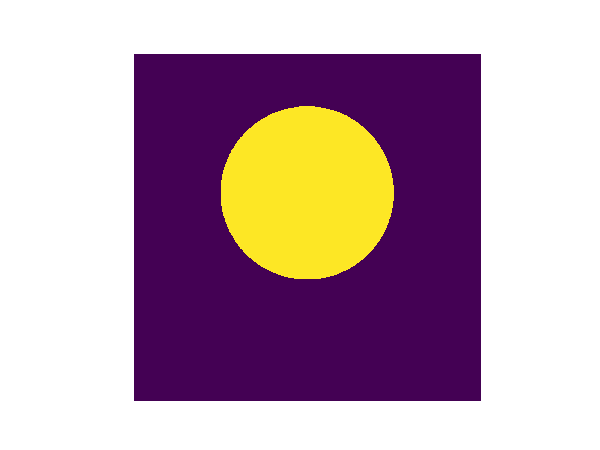

In [6]:

# Plot aperture
moe.plotting.plot_aperture(mask)


moe.plotting.plot_aperture(mask, scale=micro)

# Plot only plot
moe.plotting.plot_aperture(mask, only_plot=True)

In [7]:
type(mask)

pyMOE.aperture.Aperture

# Rectangular Aperture

<IPython.core.display.Javascript object>


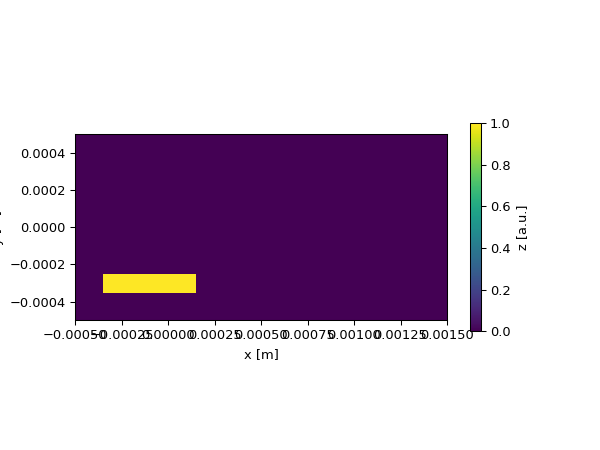

<IPython.core.display.Javascript object>


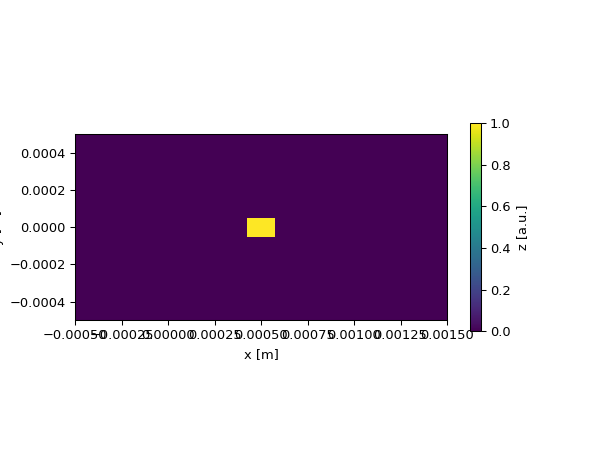

<IPython.core.display.Javascript object>


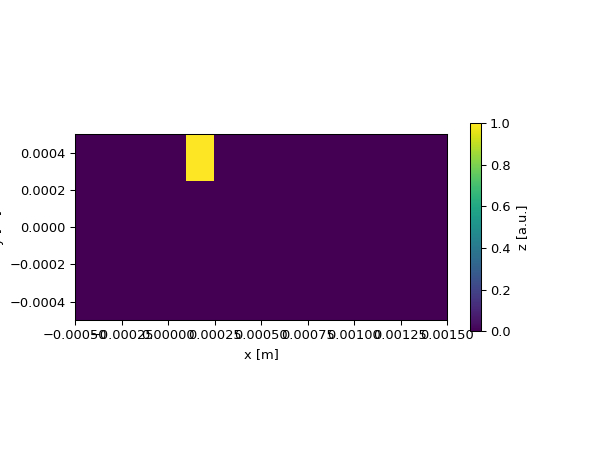

In [8]:

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)

# create rectangular mask
rectangle = moe.generate.rectangular_aperture(mask, 500*micro, 100*micro, center=(-100*micro, -300*micro))
moe.plotting.plot_aperture(rectangle, )


rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 100*micro, )
moe.plotting.plot_aperture(rectangle, )

rectangle = moe.generate.rectangular_aperture(mask, 150*micro, 500*micro, corner=(100*micro, 250*micro))
moe.plotting.plot_aperture(rectangle, )

## Fresnel Zone Plate

<IPython.core.display.Javascript object>


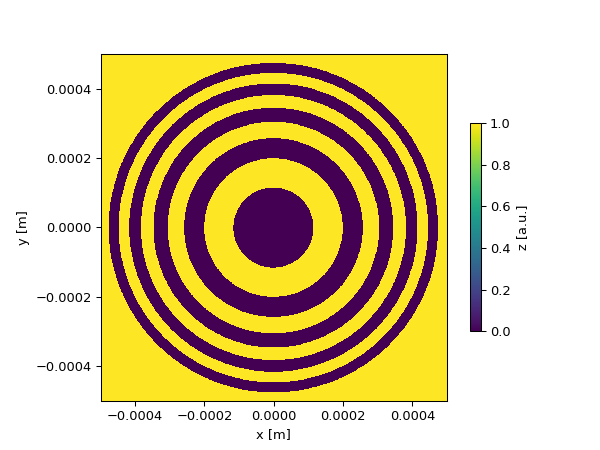

<IPython.core.display.Javascript object>


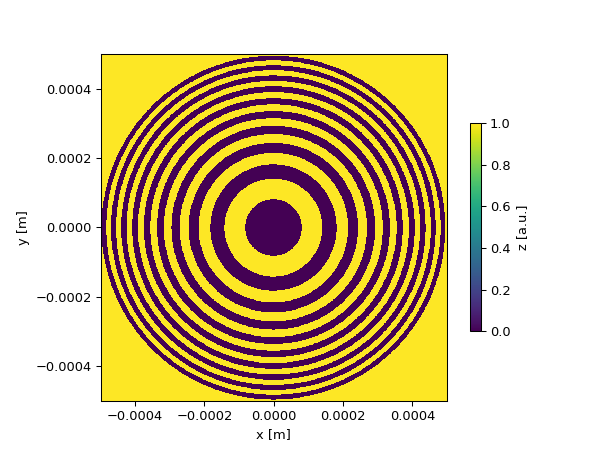

NameError: name 'ApertureField' is not defined

In [16]:

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_zone_plate_aperture(mask, 50*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )


# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=25mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_zone_plate_aperture(mask, 25*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )
moe.plotting.plot_field(mask, )



# Fresnel phase mask

<IPython.core.display.Javascript object>


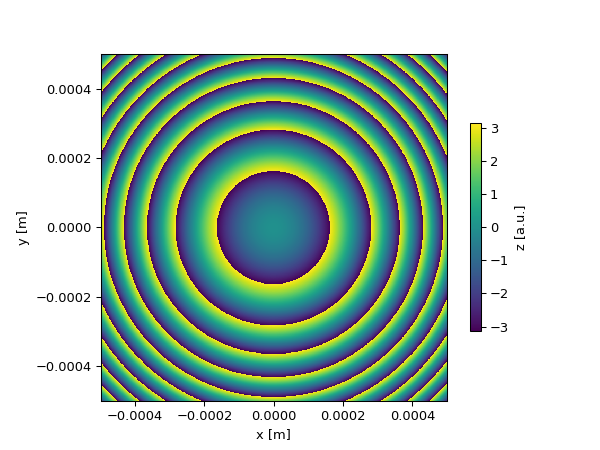

<IPython.core.display.Javascript object>


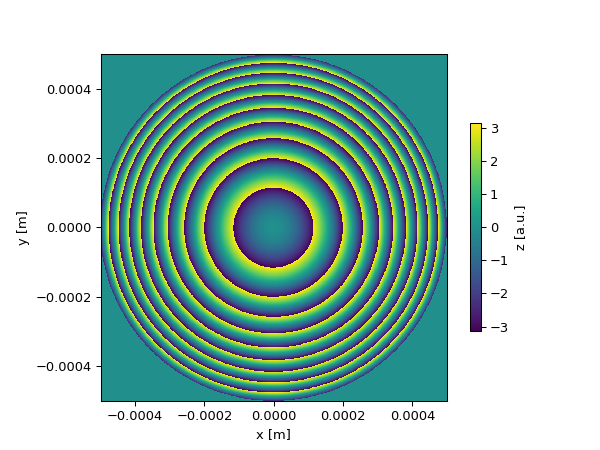

In [10]:
# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, )
moe.plotting.plot_aperture(mask, )

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=25mm, lambda=532nm, R=500µm

# and truncate around radius
mask = moe.generate.fresnel_phase(mask, 25*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )

<IPython.core.display.Javascript object>


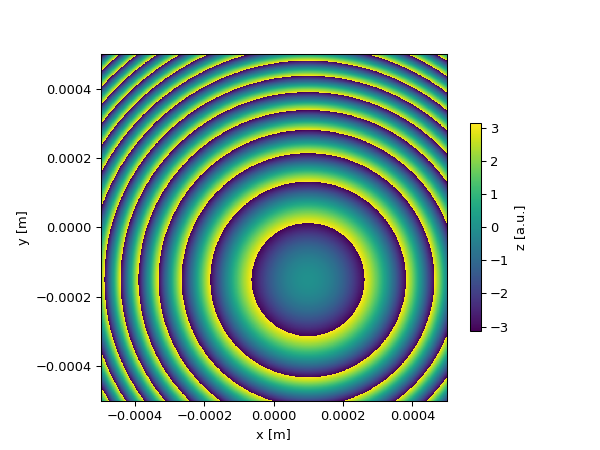

<IPython.core.display.Javascript object>


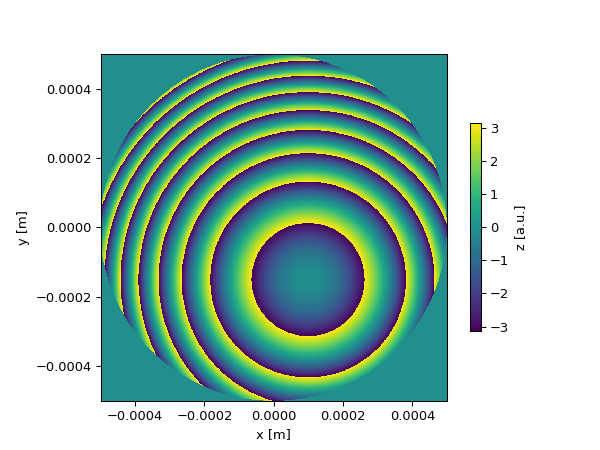

In [11]:
# offcenter fresnel phase mask
aperture = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
center=(100*micro, -150*micro)
aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.fresnel_lens_phase, center=center, focal_length=50*milli, wavelength=532*nano)

moe.plotting.plot_aperture(aperture)
# Truncate around (0,0)
aperture = moe.generate.truncate_aperture_radius(aperture, 500*micro, center=(0,0))



moe.plotting.plot_aperture(aperture)

## Spiral phase

<IPython.core.display.Javascript object>


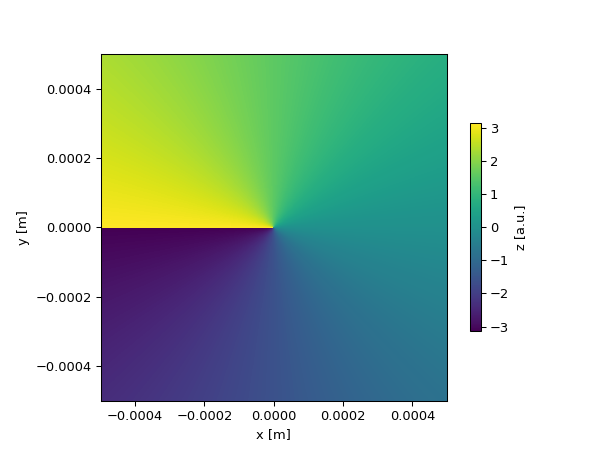

<IPython.core.display.Javascript object>


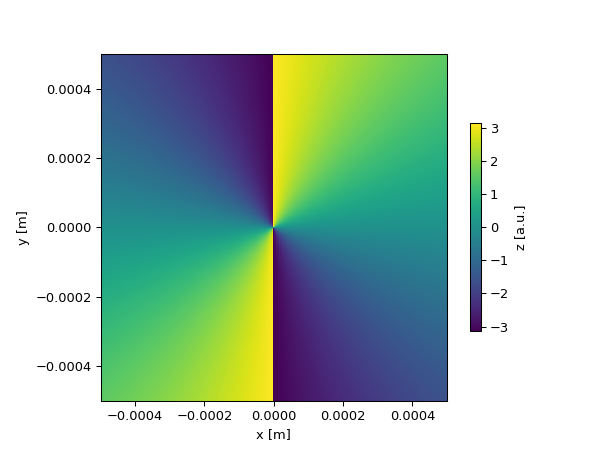

<IPython.core.display.Javascript object>


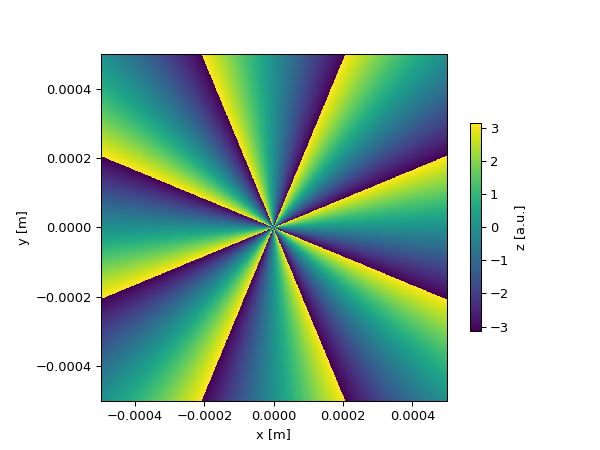

In [12]:



aperture = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
center=(0,0)
aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=1)
moe.plotting.plot_aperture(aperture)

aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=2)
moe.plotting.plot_aperture(aperture)

aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=8)
moe.plotting.plot_aperture(aperture)

<IPython.core.display.Javascript object>


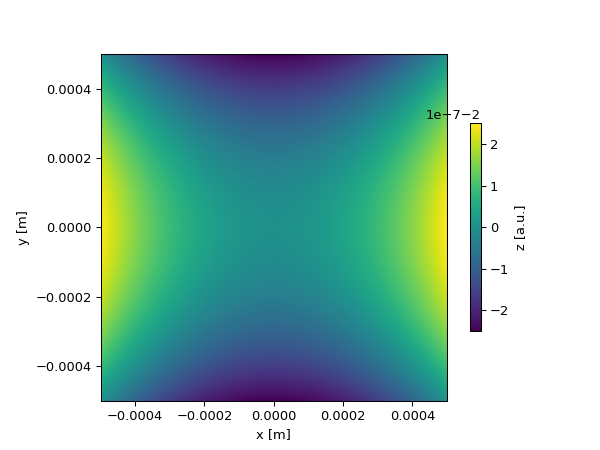

In [13]:
# Saddle function

aperture = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
center=(0,0)
aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.saddle, center=center, a=1,b=2)
moe.plotting.plot_aperture(aperture)


# Discretize mask to a number of levels

<IPython.core.display.Javascript object>


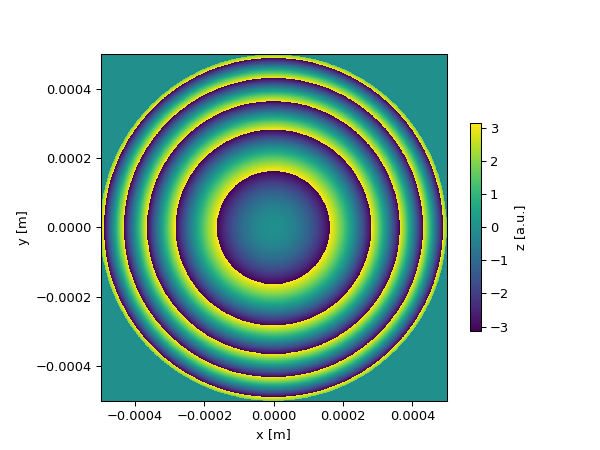

<IPython.core.display.Javascript object>


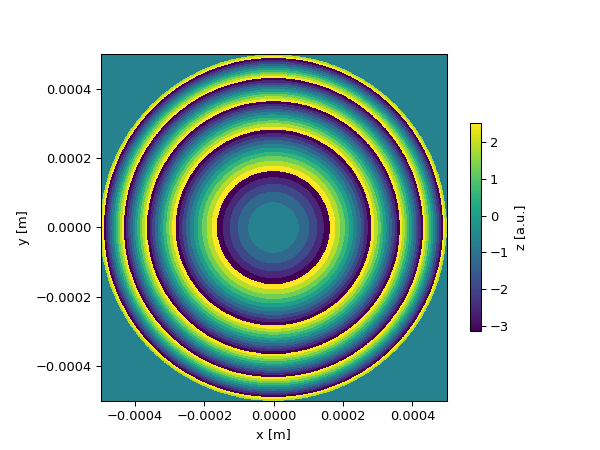

<IPython.core.display.Javascript object>


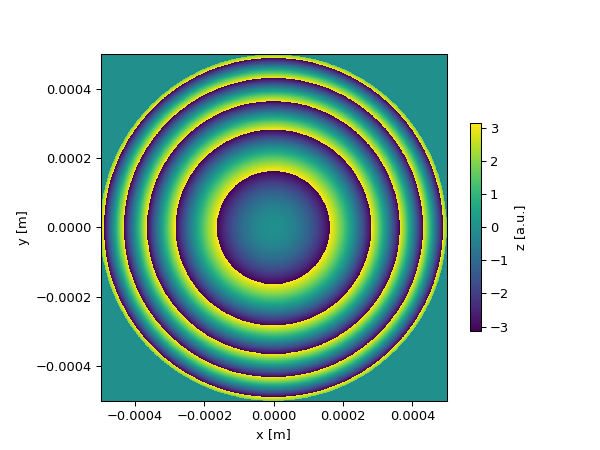

..\pyMOE\plotting.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


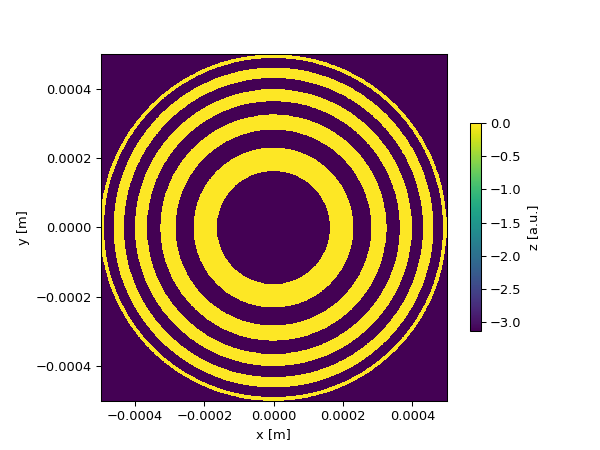

In [14]:
# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )

mask.discretize(10)
moe.plotting.plot_aperture(mask)

# Create empty mask
mask = moe.generate.create_empty_aperture(-500*micro, 500*micro, 1001, -500*micro, 500*micro, 1001,)
# f=50mm, lambda=532nm, R=500µm
mask = moe.generate.fresnel_phase(mask, 50*milli, 532*nano, radius=500*micro)
moe.plotting.plot_aperture(mask, )

mask.discretize(2)
moe.plotting.plot_aperture(mask)

<IPython.core.display.Javascript object>


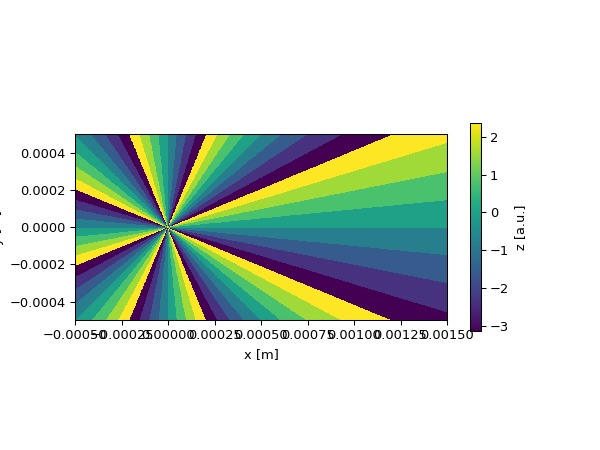

In [15]:
aperture = moe.generate.create_empty_aperture(-500*micro, 1500*micro, 1001, -500*micro, 500*micro, 1001,)

aperture =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=8)

aperture.discretize(8)

moe.plotting.plot_aperture(aperture)

